# Iris dataset classification

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression

In [3]:
iris = pd.read_csv('Iris.csv')

In [193]:
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [194]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [195]:
iris.shape

(150, 6)

In [196]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [197]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [198]:
iris.isnull()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
145,False,False,False,False,False,False
146,False,False,False,False,False,False
147,False,False,False,False,False,False
148,False,False,False,False,False,False


In [199]:
print(iris['Species'].value_counts())

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64


In [200]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [201]:
iris.duplicated().sum()

0

Data visualization

Text(0, 0.5, 'petal length')

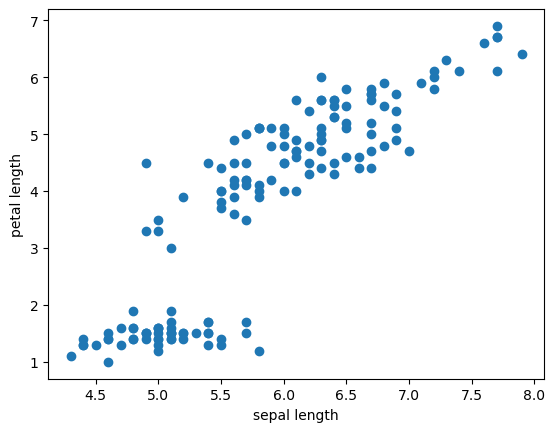

In [202]:
plt.scatter(iris['SepalLengthCm'], iris['PetalLengthCm'])

plt.xlabel('sepal length')
plt.ylabel('petal length')

In [203]:
iris.sample(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
86,87,6.7,3.1,4.7,1.5,Iris-versicolor
21,22,5.1,3.7,1.5,0.4,Iris-setosa
72,73,6.3,2.5,4.9,1.5,Iris-versicolor
96,97,5.7,2.9,4.2,1.3,Iris-versicolor


In [204]:
iris['Species'] = iris['Species'].replace({'Iris-virginica': 0, 'Iris-versicolor': 1, 'Iris-setosa': 2})

In [205]:
iris.sample(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
5,6,5.4,3.9,1.7,0.4,2
124,125,6.7,3.3,5.7,2.1,0
10,11,5.4,3.7,1.5,0.2,2
4,5,5.0,3.6,1.4,0.2,2
76,77,6.8,2.8,4.8,1.4,1


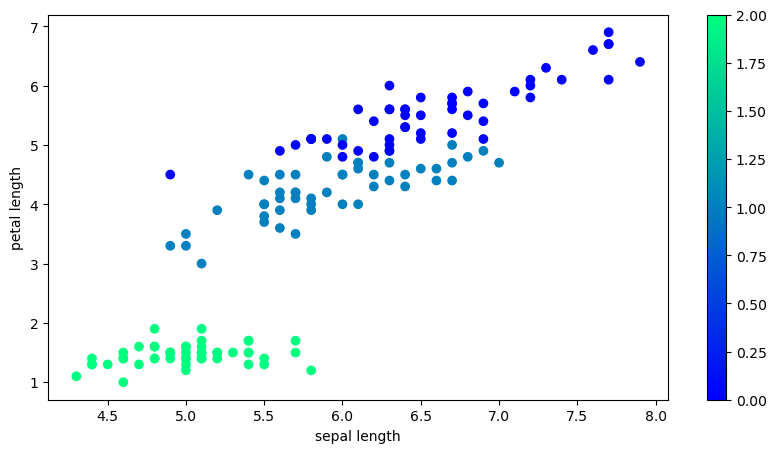

In [206]:
plt.figure(figsize=(10,5))
plt.scatter(iris['SepalLengthCm'], iris['PetalLengthCm'], c=iris['Species'], cmap=('winter'))

plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.colorbar()

## Check Relationship

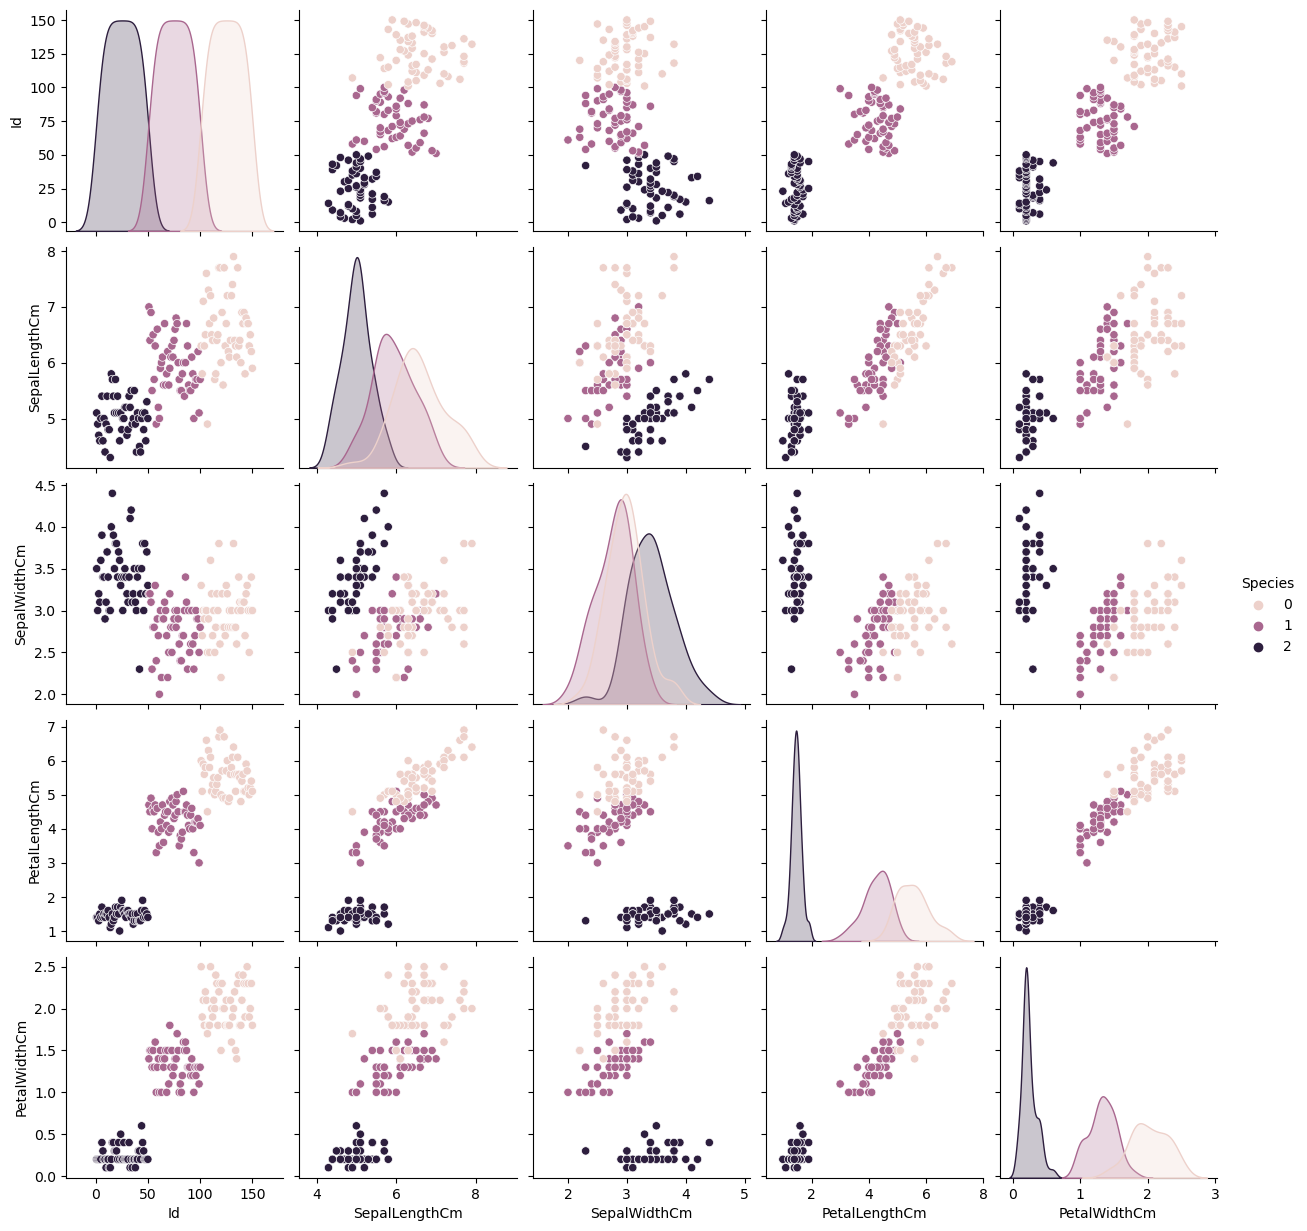

In [207]:
sns.pairplot(data=iris, hue='Species')
plt.show()

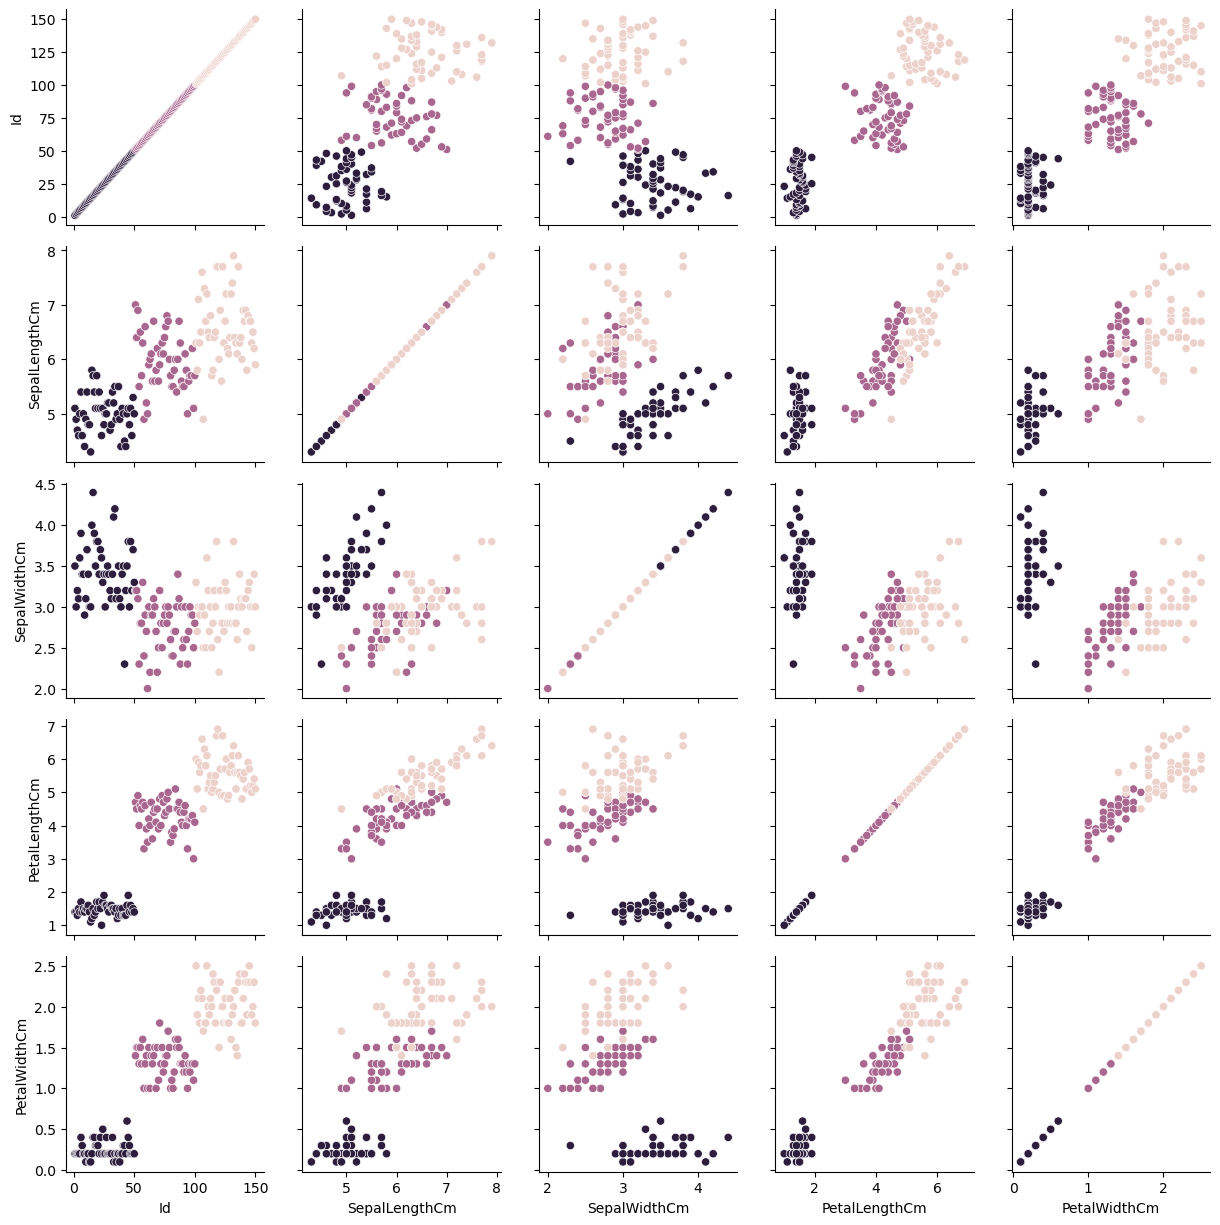

In [208]:
# pairgrid

g = sns.PairGrid(data=iris,  hue='Species')
g.map(sns.scatterplot)

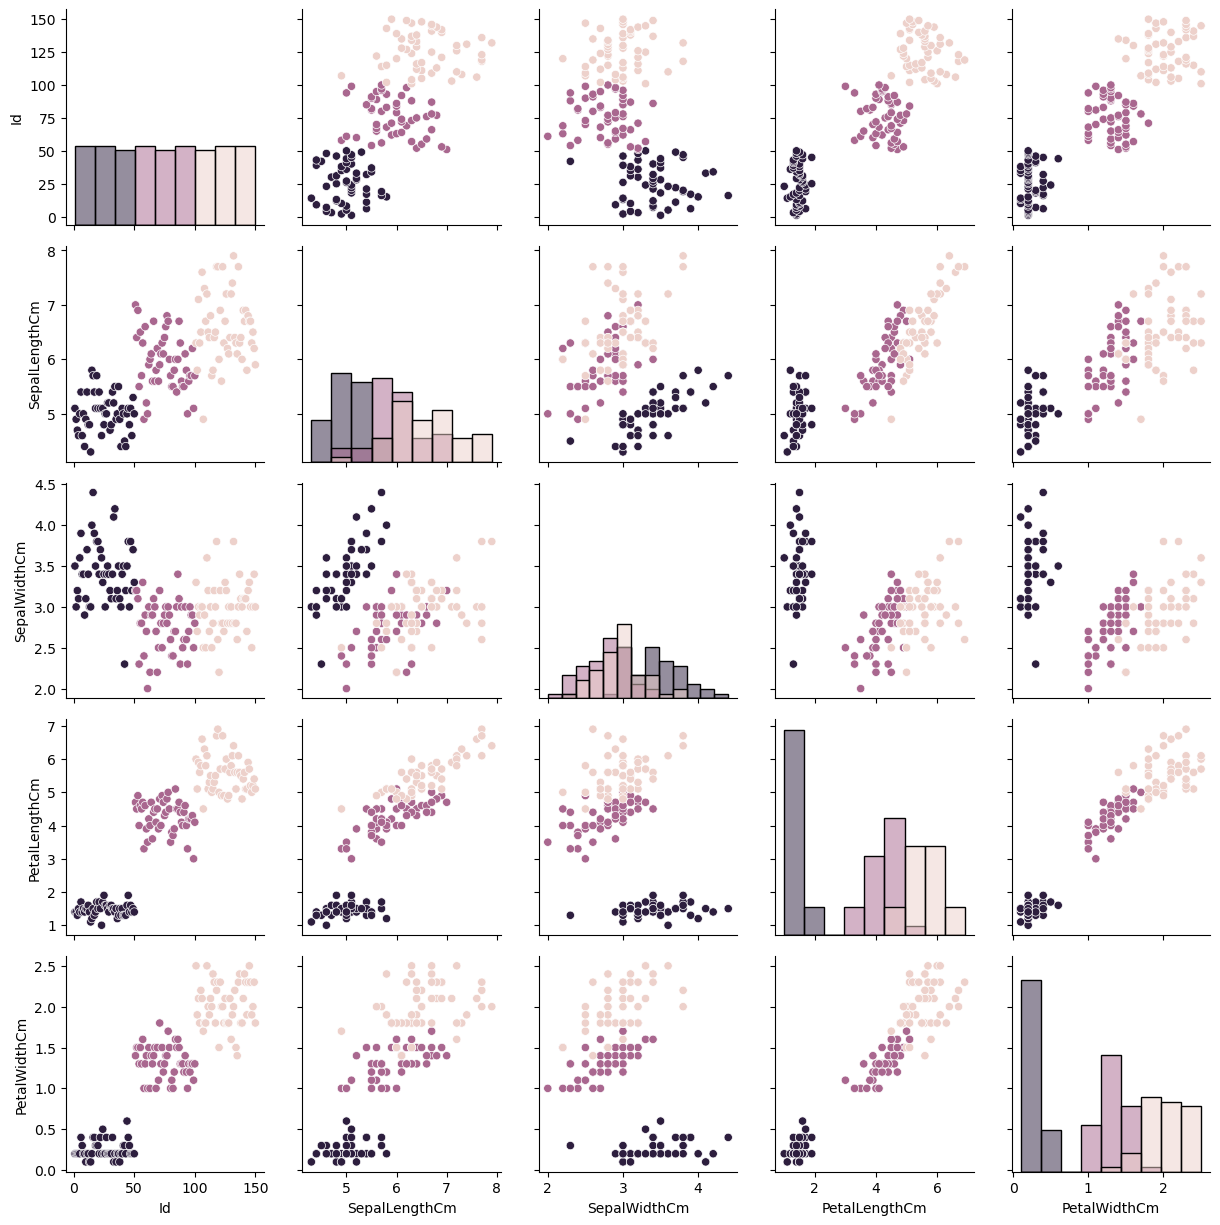

In [209]:
#  map_diag vs map_offdiag

g = sns.PairGrid(data=iris, hue='Species')
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

In [210]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,2
1,2,4.9,3.0,1.4,0.2,2
2,3,4.7,3.2,1.3,0.2,2
3,4,4.6,3.1,1.5,0.2,2
4,5,5.0,3.6,1.4,0.2,2


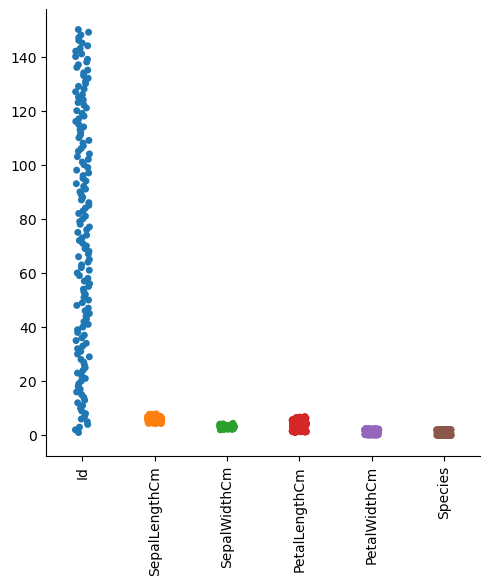

In [211]:
sns.catplot(data=iris)
plt.xticks(rotation='vertical')
plt.show()

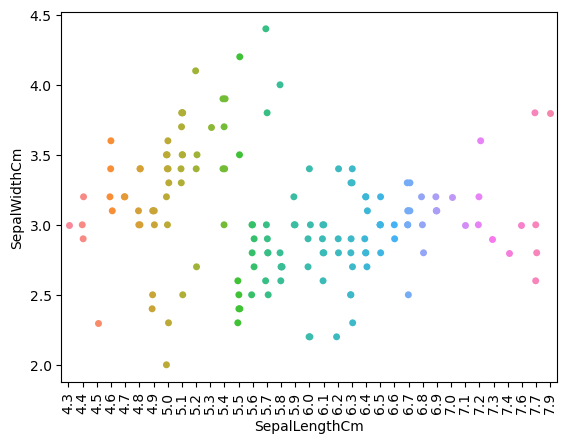

In [212]:
sns.stripplot(data=iris , x='SepalLengthCm', y='SepalWidthCm')
plt.xticks(rotation='vertical')
plt.show()

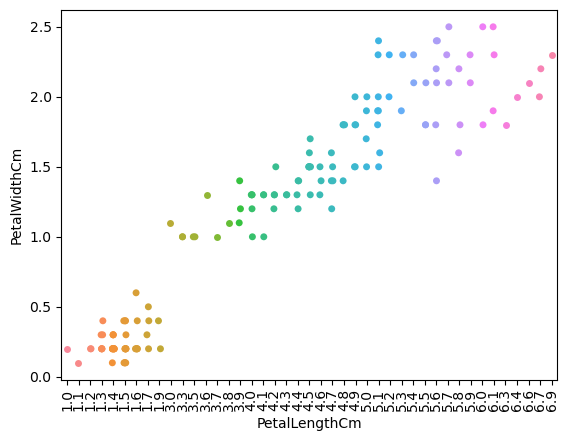

In [213]:
sns.stripplot(data=iris , x='PetalLengthCm', y='PetalWidthCm')
plt.xticks(rotation='vertical')
plt.show()

<AxesSubplot:ylabel='SepalWidthCm'>

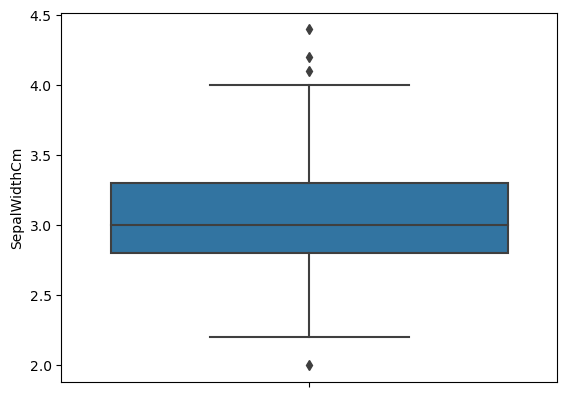

In [214]:
sns.boxplot(data=iris, y='SepalWidthCm')

# check outliers using boxplot


Id                  AxesSubplot(0.125,0.786098;0.352273x0.0939024)
SepalLengthCm    AxesSubplot(0.547727,0.786098;0.352273x0.0939024)
SepalWidthCm        AxesSubplot(0.125,0.673415;0.352273x0.0939024)
PetalLengthCm    AxesSubplot(0.547727,0.673415;0.352273x0.0939024)
PetalWidthCm        AxesSubplot(0.125,0.560732;0.352273x0.0939024)
dtype: object

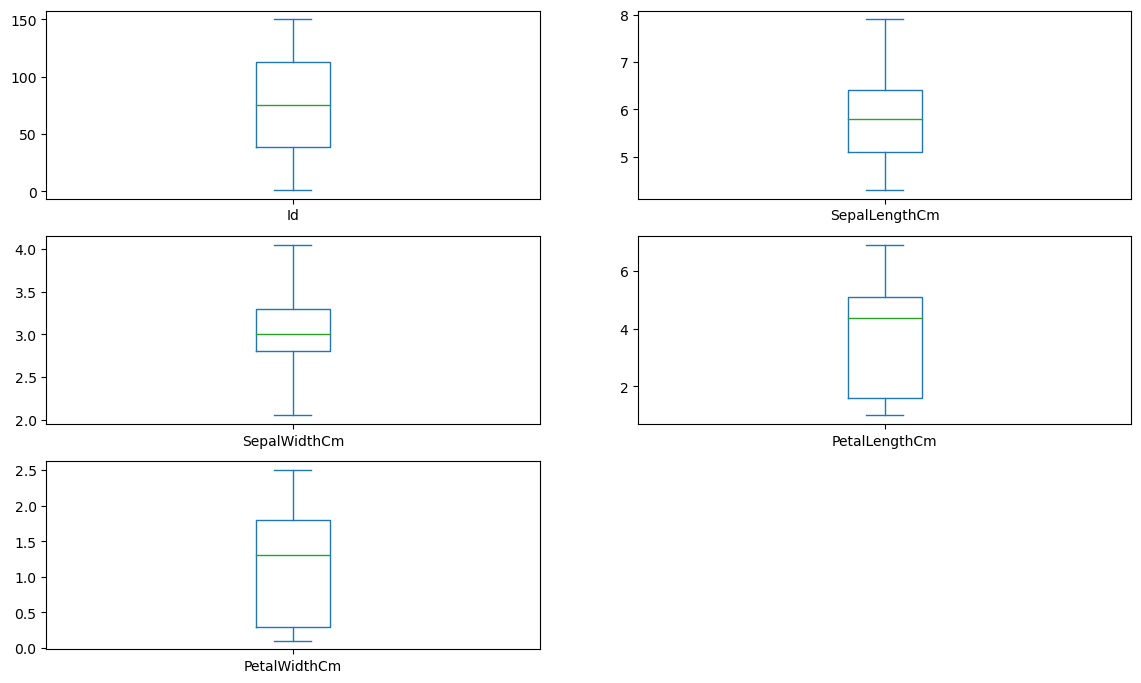

In [221]:
df.plot(kind = "box",subplots = True,layout = (7,2),figsize=(14,20))

def outlier(col):
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1 - 1.5 * IQR
    upper_whisker = Q3 + 1.5 * IQR
    return np.clip(col, lower_whisker, upper_whisker)

def test_ol(df):
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    for col in numeric_cols:
        df[col] = outlier(df[col])
    return df

df = test_ol(df)

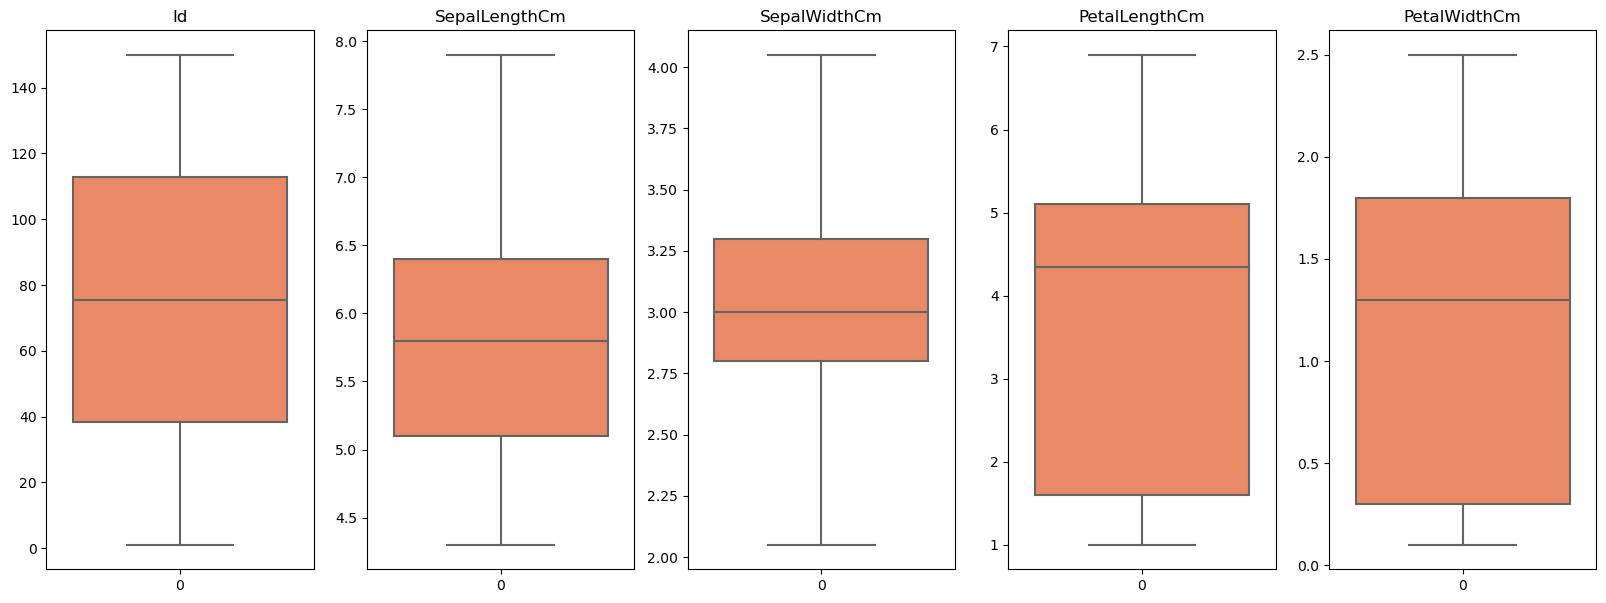

In [216]:
plt.subplots(figsize=(20,7)) 
for i,a in enumerate(df.drop(columns="Species").columns):
    plt.subplot(1,5,i+1)
    sns.boxplot(data=df[a],color="coral")
    plt.title(a)
plt.show()

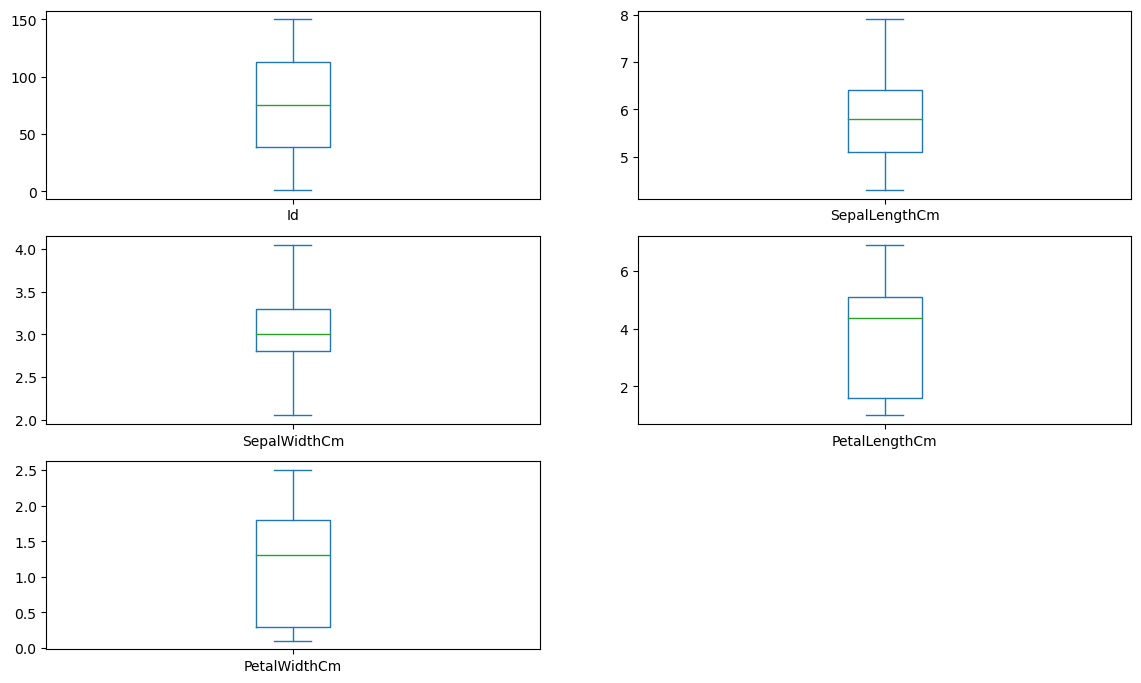

In [217]:
df.plot(kind = "box",subplots = True,layout = (7,2),figsize=(14,20))
plt.show()

In [218]:
x = df.drop(columns="Species")
y = df["Species"]

## Test and Train

In [219]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [166]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

### Logistic reggresion

In [167]:
lr = LogisticRegression(random_state=0)
lr.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [168]:
y_pred = lr.predict(x_test)

In [169]:
y_pred

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa'], dtype=object)

In [170]:
y_train

137     Iris-virginica
84     Iris-versicolor
27         Iris-setosa
127     Iris-virginica
132     Iris-virginica
            ...       
9          Iris-setosa
103     Iris-virginica
67     Iris-versicolor
117     Iris-virginica
47         Iris-setosa
Name: Species, Length: 120, dtype: object

In [171]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
matrix= confusion_matrix(y_test, y_pred)
print(matrix)

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


In [172]:
print(accuracy_score(y_test,y_pred))

1.0


In [173]:
cr= classification_report(y_test, y_pred)
print(cr)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



<AxesSubplot:>

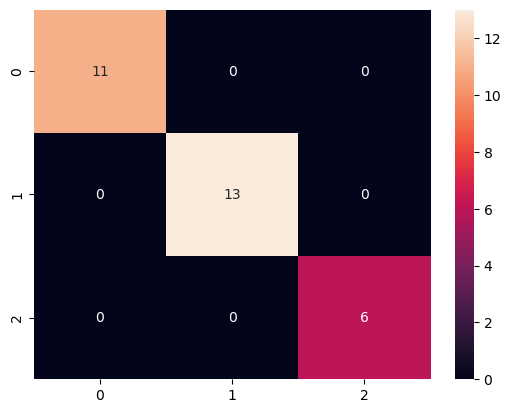

In [174]:
sns.heatmap(matrix, annot=True)

## Probability density function(PDF) in iris dataset 

FEATURE SELECTION

In [178]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


<AxesSubplot:xlabel='PetalLengthCm', ylabel='Density'>

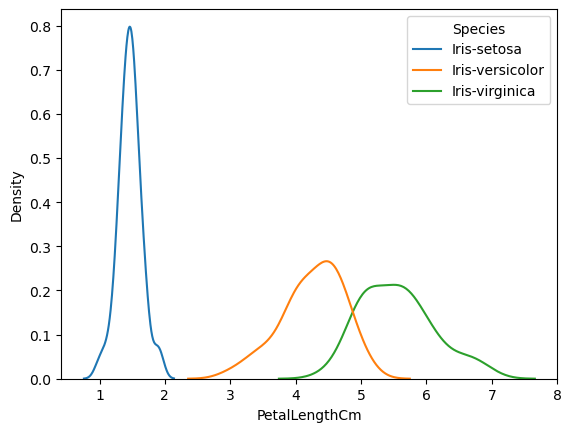

In [179]:
sns.kdeplot(iris['PetalLengthCm'],hue=iris['Species'])

<AxesSubplot:xlabel='PetalWidthCm', ylabel='Density'>

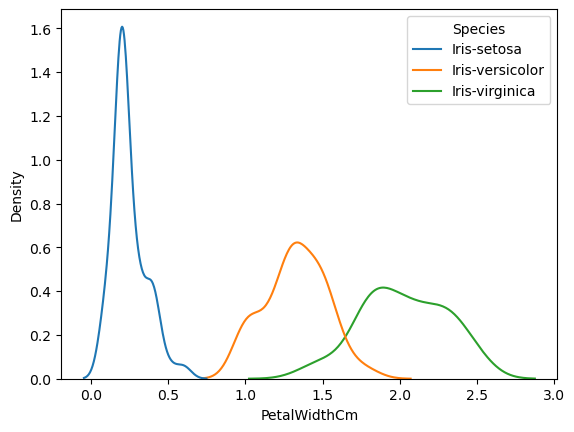

In [183]:
sns.kdeplot(iris['PetalWidthCm'],hue=iris['Species'])

<AxesSubplot:xlabel='SepalLengthCm', ylabel='Density'>

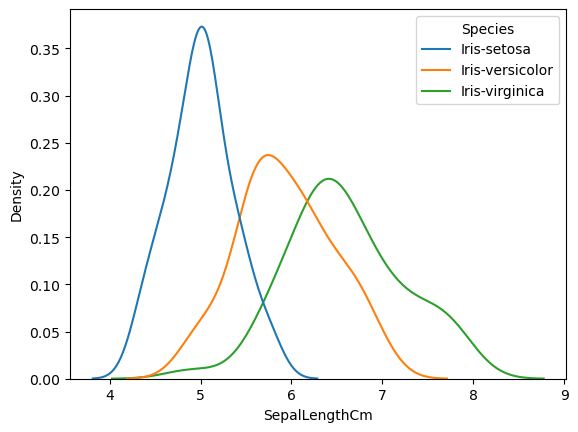

In [184]:
sns.kdeplot(iris['SepalLengthCm'],hue=iris['Species'])

<AxesSubplot:xlabel='SepalWidthCm', ylabel='Density'>

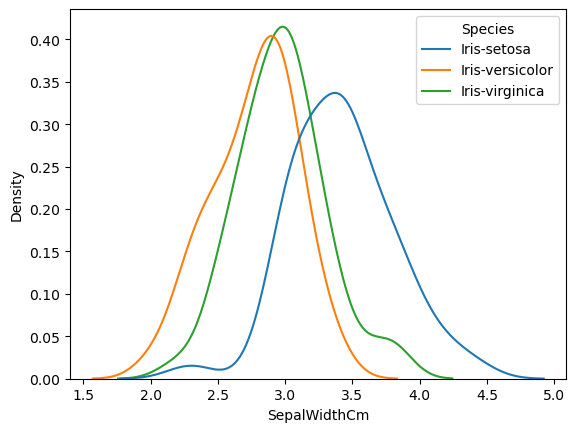

In [185]:
sns.kdeplot(iris['SepalWidthCm'],hue=iris['Species'])

Que.  GIVEN THIS FOUR MAJORMENT WE PREDICT THE TYPE OF FLOWER?

Ans:-  With the help of graph it clearly show that petal_length and petal_width is better indicator of distinguish between this three flower.

###  Cumulative distribution function (cdf) 

<AxesSubplot:xlabel='PetalWidthCm', ylabel='Density'>

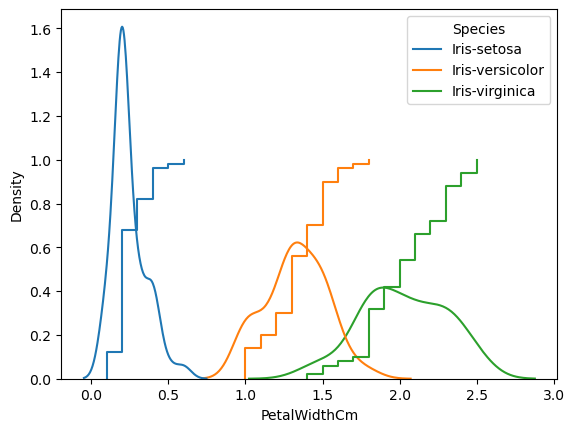

In [186]:
sns.kdeplot(iris['PetalWidthCm'],hue=iris['Species'])
sns.ecdfplot(data=iris, x='PetalWidthCm', hue='Species')